## FrozenLake

### Deterministic

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A1 folder, then '2020FA/A1'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2020FA/A1'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/RL/DQN1' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['test.py', 'model', 'dqn', '__pycache__', '.ipynb_checkpoints', 'utils.py', 'dqn_results4', 'dqn_models4', 'train.py', 'DQN.ipynb', 'DQN-2.ipynb', 'dqn_models4_test', 'dqn_results4_test', 'dqn_models4_stochastic', 'dqn_results4_stochastic', 'Results_table_stochastic.csv', 'DQN - Test.ipynb', 'dqn_models_deterministic', 'dqn_results_deterministic', 'Results_table.csv', 'DQN - Deterministic.ipynb', 'DQN Stochastic.ipynb']


In [ ]:
cd drive/MyDrive/Colab \Notebooks/RL/DQN1

/content/drive/MyDrive/Colab Notebooks/RL/DQN1


### Train

In [ ]:
import argparse

import gym
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import time
from torch.autograd import Variable
from sklearn.model_selection import ParameterGrid
from tqdm import trange


from dqn.agent import Agent
from model.architecture import Net
from utils import *


def run(env, models_folder, episodes, steps, gamma, e, lr):
    # Initialize history memory
    step_list = []
    reward_list = []
    loss_list = []
    e_list = []

    state_space = env.observation_space.n
    action_space = env.action_space.n

    agent = Agent(e, gamma, state_space, action_space, Net(state_space, action_space))
    agent.train(True)
    loss = nn.MSELoss()
    optimizer = optim.Adam(agent.model.parameters(), lr=lr)

    for i in trange(episodes):
        state = int(env.reset())
        reward_all = 0
        done = False
        s = 0
        total_loss = 0

        for s in range(steps):
            state = Variable(OH(state, state_space))

            # propose an action
            action = agent.select_action(state)

            # what are the consequences of taking that action?
            new_state, reward, done, _ = env.step(action)

            # if we're dead
            if done and (reward == 0.0):
                reward = -1

            # store memories for experience replay
            Q1 = agent.model(Variable(OH(new_state, state_space)))
            targetQ = agent.remember(Q1, action, reward)

            # optimize predicting rewards
            output = agent.model(state)
            train_loss = loss(output, targetQ)
            total_loss += train_loss.data

            agent.model.zero_grad()
            train_loss.backward()
            optimizer.step()

            # move to next state
            reward_all += reward
            state = new_state

            if reward==1:
                break;

            # decrease epsilon after success
            if done:
                if reward > 0:
                    agent.epsilon *= 0.9 + 1E-6  # always explore a bit during training
                break

        # logging epochs
        loss_list.append(total_loss / s)
        step_list.append(s)
        reward_list.append(reward_all)
        e_list.append(agent.epsilon)

    agent.save_model(f'{models_folder}/net_params_'+str(episodes)+'_'+str(steps)+'_'+str(gamma)+'_'+str(e)+'_'+str(lr)+'.pkl')
    return step_list, e_list, reward_list, loss_list    

100%|██████████| 5000/5000 [12:33<00:00,  6.64it/s]


{'comb': 0, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.1, 'wins': 409.0, 'Success Ep': 0.0818, 'elapsed time (s)': 753.4504685401917}


100%|██████████| 5000/5000 [14:55<00:00,  5.58it/s]


{'comb': 1, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.01, 'wins': 26.0, 'Success Ep': 0.0052, 'elapsed time (s)': 895.5094397068024}


100%|██████████| 5000/5000 [15:15<00:00,  5.46it/s]


{'comb': 2, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.001, 'wins': 7.0, 'Success Ep': 0.0014, 'elapsed time (s)': 915.0516285896301}


100%|██████████| 5000/5000 [15:37<00:00,  5.33it/s]


{'comb': 3, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.0001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 937.4753494262695}


100%|██████████| 5000/5000 [11:32<00:00,  7.22it/s]


{'comb': 4, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.1, 'wins': 786.0, 'Success Ep': 0.1572, 'elapsed time (s)': 692.5411899089813}


100%|██████████| 5000/5000 [01:22<00:00, 60.59it/s]


{'comb': 5, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.01, 'wins': 4867.0, 'Success Ep': 0.9734, 'elapsed time (s)': 82.5475594997406}


100%|██████████| 5000/5000 [16:00<00:00,  5.20it/s]


{'comb': 6, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.001, 'wins': 1.0, 'Success Ep': 0.0002, 'elapsed time (s)': 960.804473400116}


100%|██████████| 5000/5000 [15:50<00:00,  5.26it/s]


{'comb': 7, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.0001, 'wins': 8.0, 'Success Ep': 0.0016, 'elapsed time (s)': 950.7131247520447}


100%|██████████| 5000/5000 [10:51<00:00,  7.67it/s]


{'comb': 8, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.1, 'wins': 1004.0, 'Success Ep': 0.2008, 'elapsed time (s)': 651.5271425247192}


100%|██████████| 5000/5000 [15:00<00:00,  5.55it/s]


{'comb': 9, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.01, 'wins': 32.0, 'Success Ep': 0.0064, 'elapsed time (s)': 900.6150000095367}


100%|██████████| 5000/5000 [15:48<00:00,  5.27it/s]


{'comb': 10, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 948.9253227710724}


/content/drive/My Drive/Colab Notebooks/RL/DQN1/utils.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[5, 10])
/content/drive/My Drive/Colab Notebooks/RL/DQN1/utils.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[5, 10])
100%|██████████| 5000/5000 [04:01<00:00, 20.66it/s]


{'comb': 11, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.0001, 'wins': 3050.0, 'Success Ep': 0.61, 'elapsed time (s)': 241.98863339424133}


100%|██████████| 5000/5000 [15:42<00:00,  5.30it/s]


{'comb': 12, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.1, 'wins': 77.0, 'Success Ep': 0.0154, 'elapsed time (s)': 942.801263332367}


100%|██████████| 5000/5000 [15:45<00:00,  5.29it/s]


{'comb': 13, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.01, 'wins': 29.0, 'Success Ep': 0.0058, 'elapsed time (s)': 945.9867389202118}


100%|██████████| 5000/5000 [15:55<00:00,  5.24it/s]


{'comb': 14, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 955.1212112903595}


100%|██████████| 5000/5000 [15:55<00:00,  5.23it/s]


{'comb': 15, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.0001, 'wins': 1.0, 'Success Ep': 0.0002, 'elapsed time (s)': 955.339305639267}


100%|██████████| 5000/5000 [15:48<00:00,  5.27it/s]


{'comb': 16, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.1, 'wins': 75.0, 'Success Ep': 0.015, 'elapsed time (s)': 948.1841416358948}


100%|██████████| 5000/5000 [15:43<00:00,  5.30it/s]


{'comb': 17, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.01, 'wins': 19.0, 'Success Ep': 0.0038, 'elapsed time (s)': 943.039701461792}


100%|██████████| 5000/5000 [15:53<00:00,  5.24it/s]


{'comb': 18, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 953.5745236873627}


100%|██████████| 5000/5000 [16:04<00:00,  5.18it/s]


{'comb': 19, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.0001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 964.467517375946}


100%|██████████| 5000/5000 [15:46<00:00,  5.28it/s]


{'comb': 20, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.1, 'wins': 78.0, 'Success Ep': 0.0156, 'elapsed time (s)': 946.3908026218414}


100%|██████████| 5000/5000 [15:43<00:00,  5.30it/s]


{'comb': 21, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.01, 'wins': 46.0, 'Success Ep': 0.0092, 'elapsed time (s)': 943.4391145706177}


100%|██████████| 5000/5000 [16:06<00:00,  5.17it/s]


{'comb': 22, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 966.9071366786957}


100%|██████████| 5000/5000 [15:59<00:00,  5.21it/s]


{'comb': 23, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.0001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 959.2904915809631}


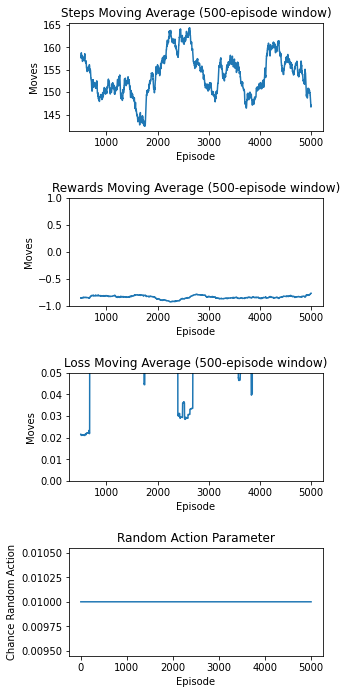

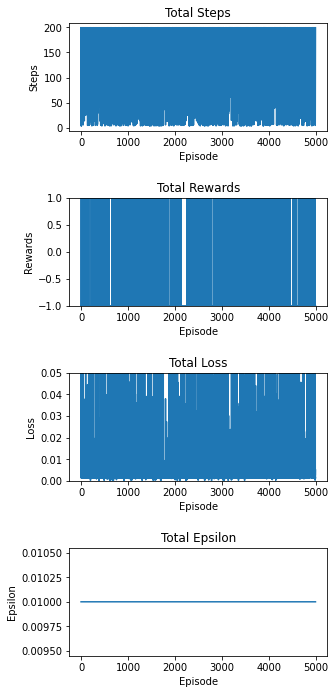

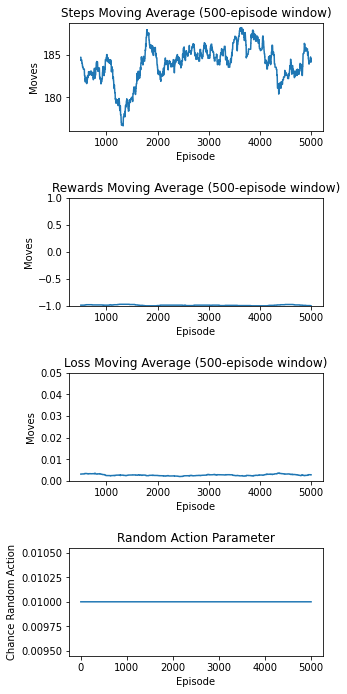

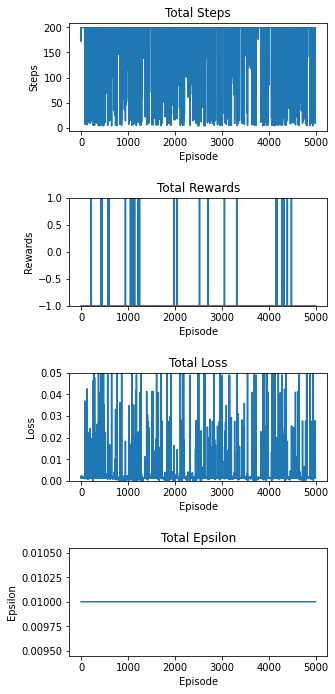

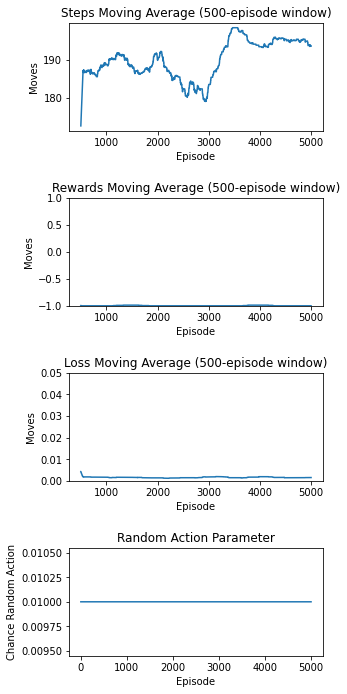

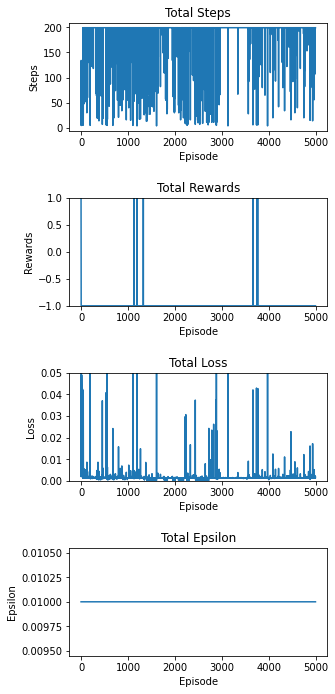

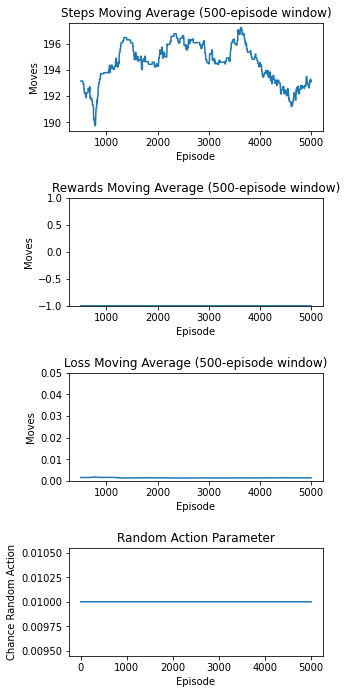

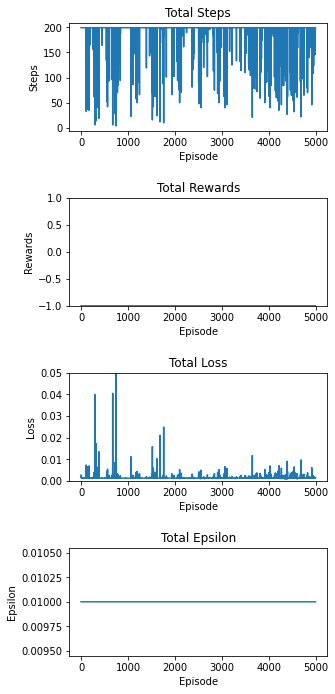

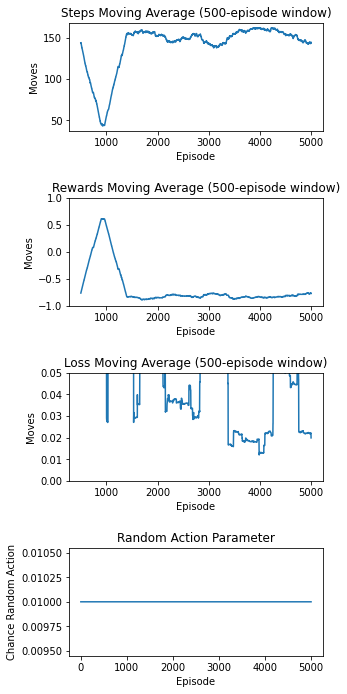

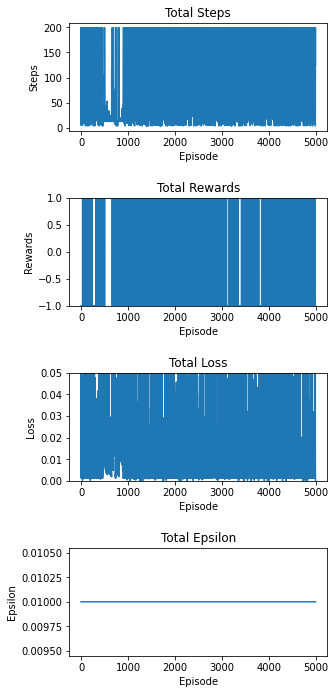

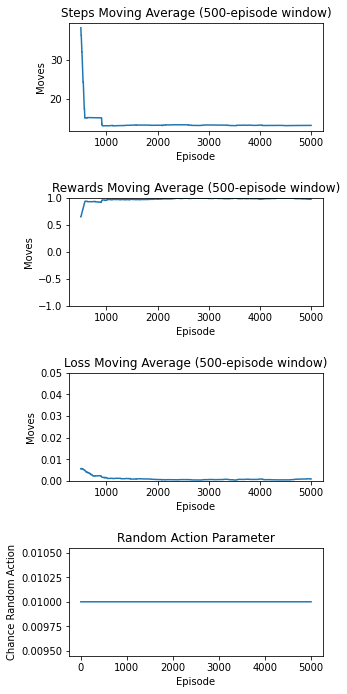

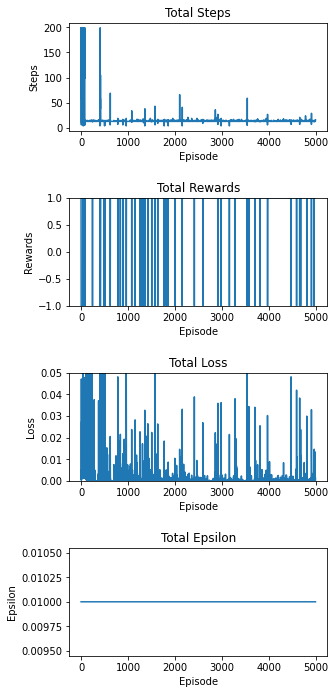

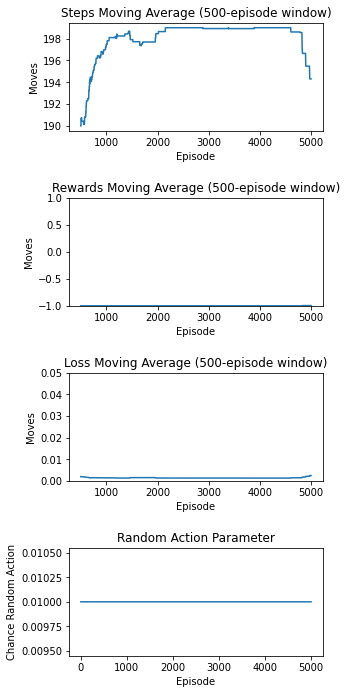

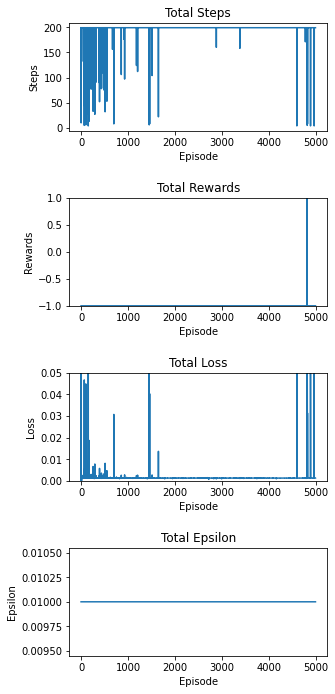

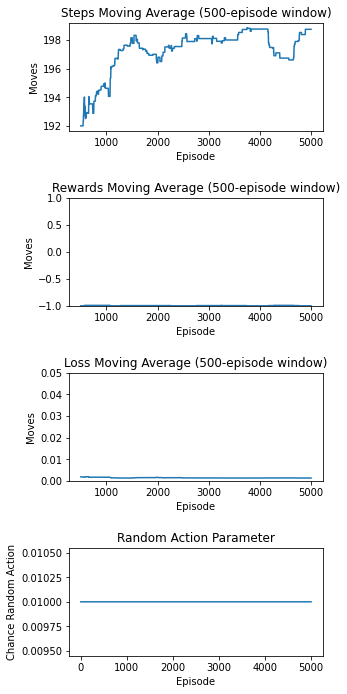

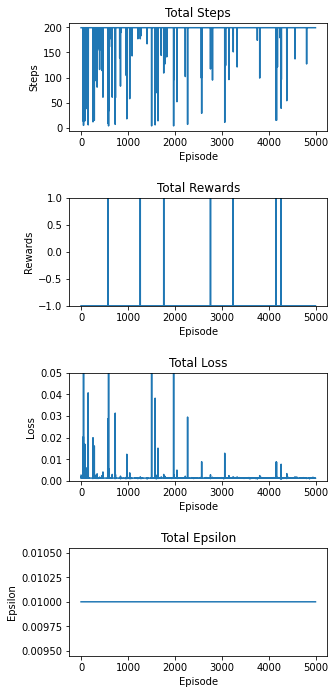

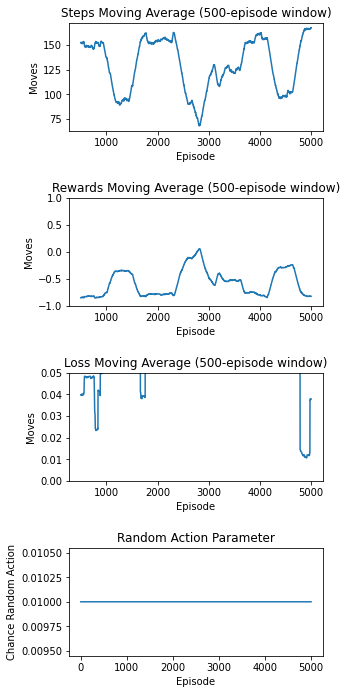

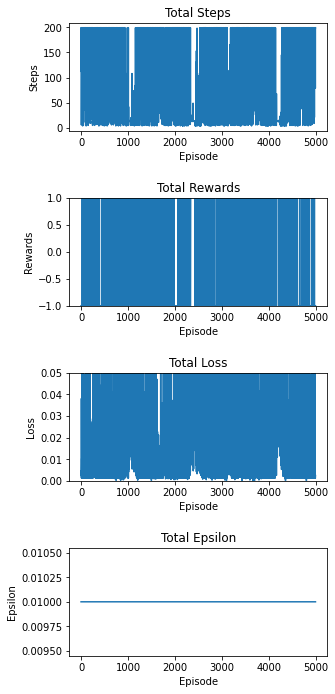

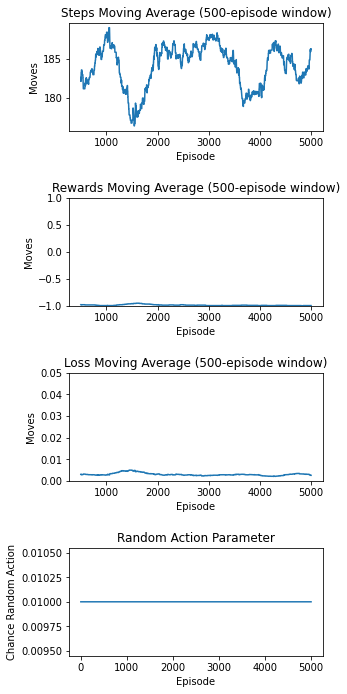

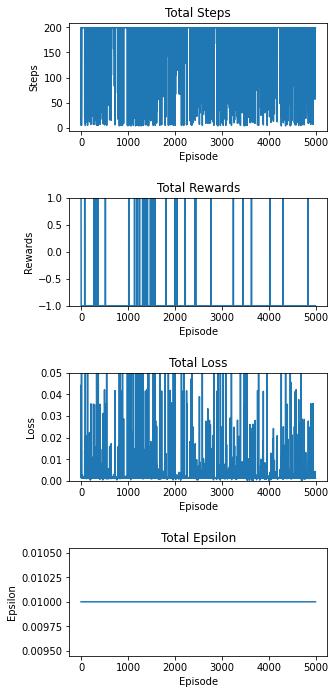

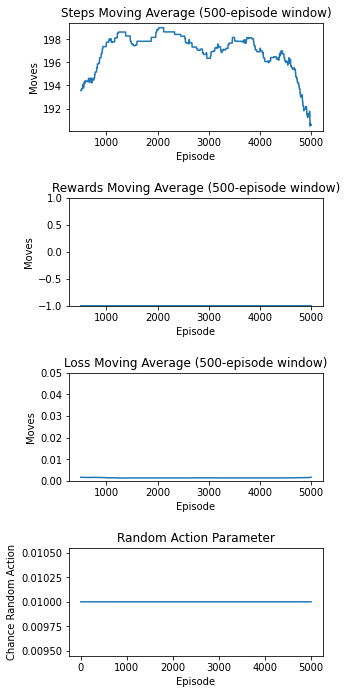

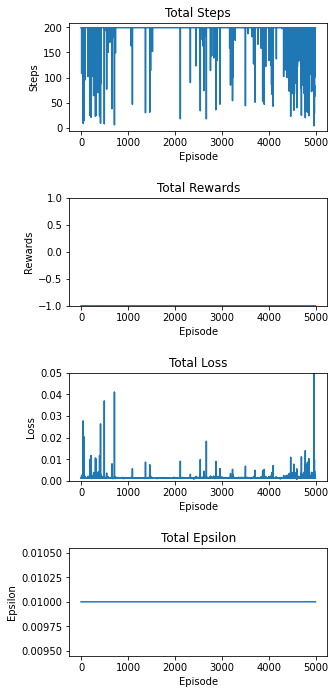

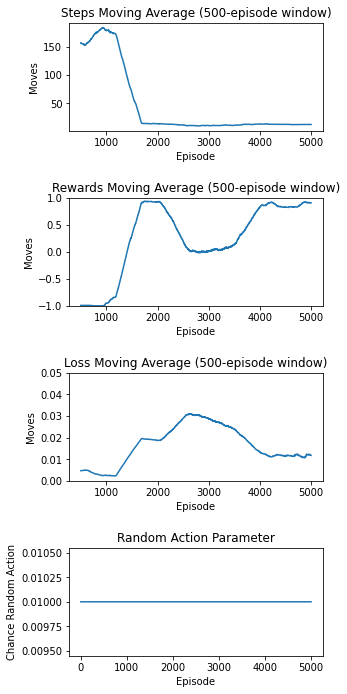

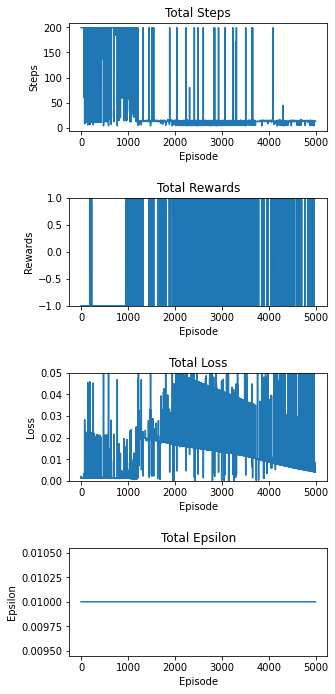

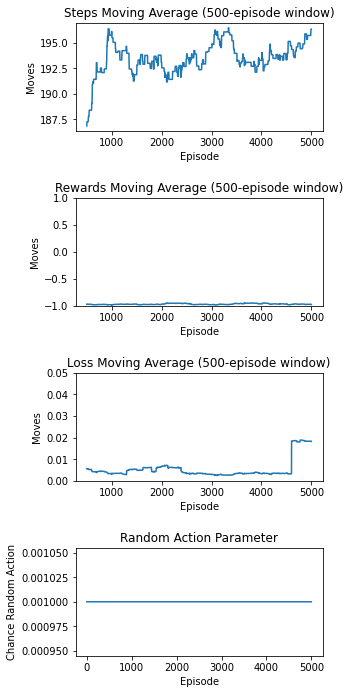

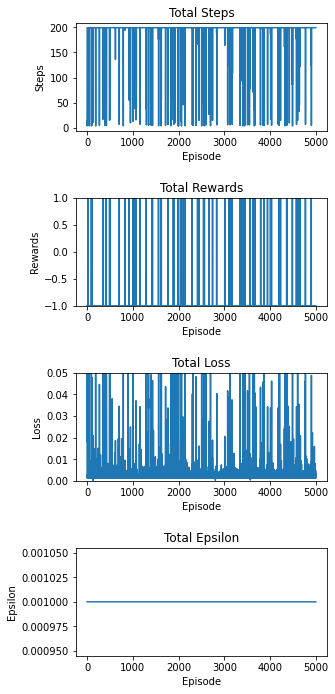

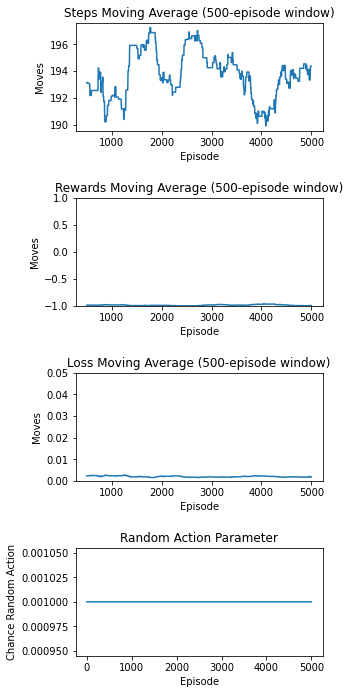

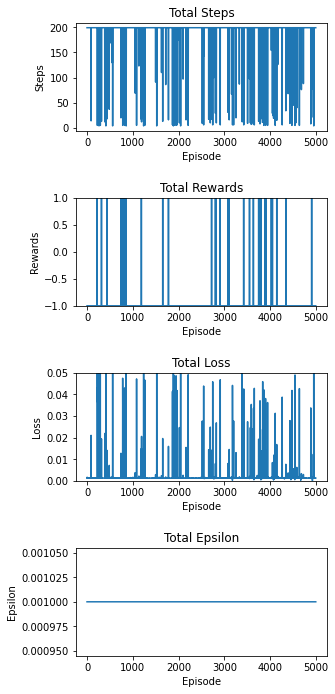

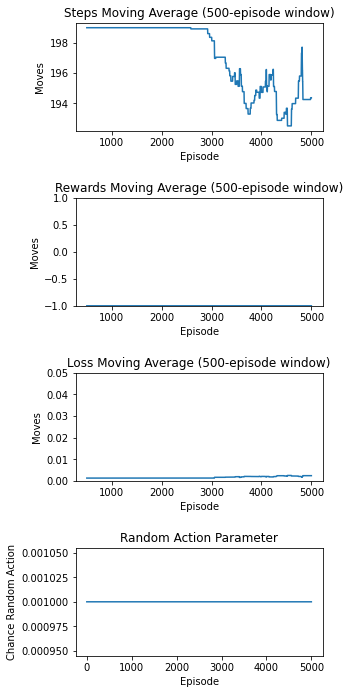

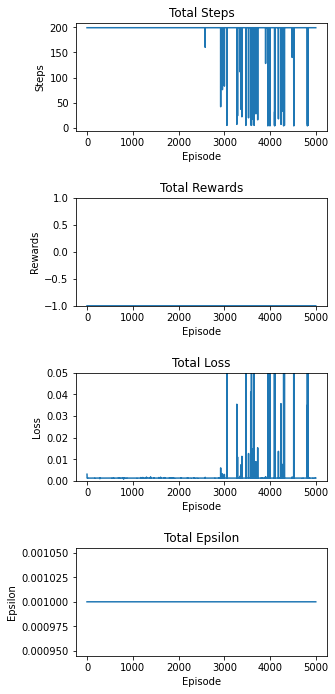

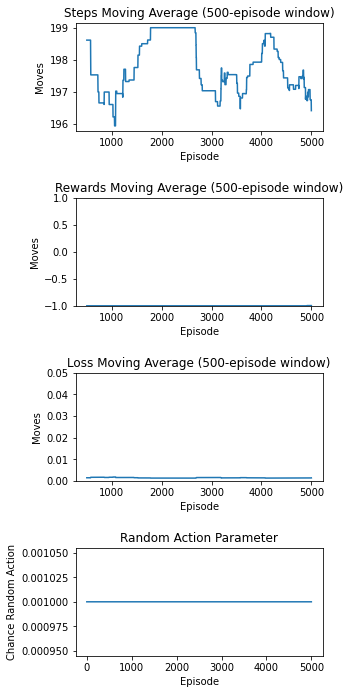

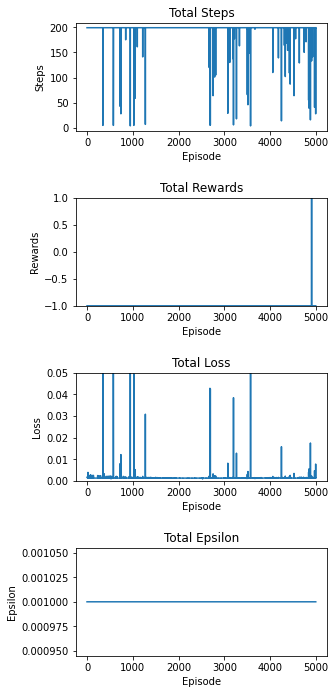

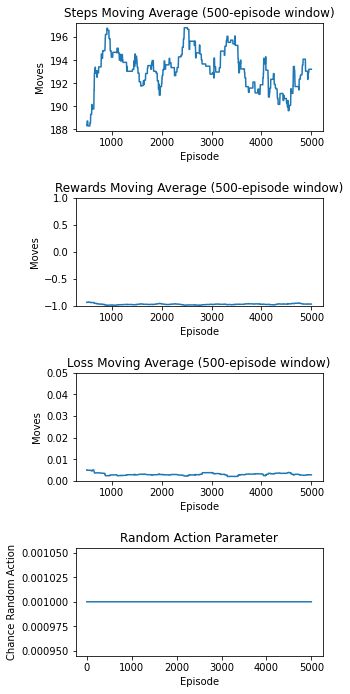

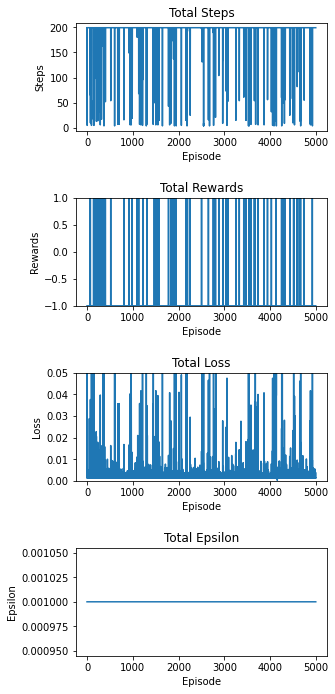

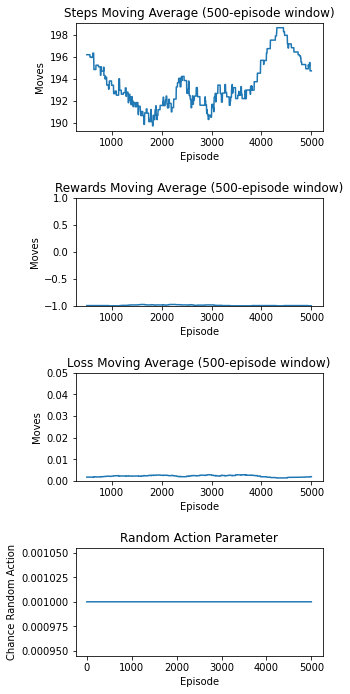

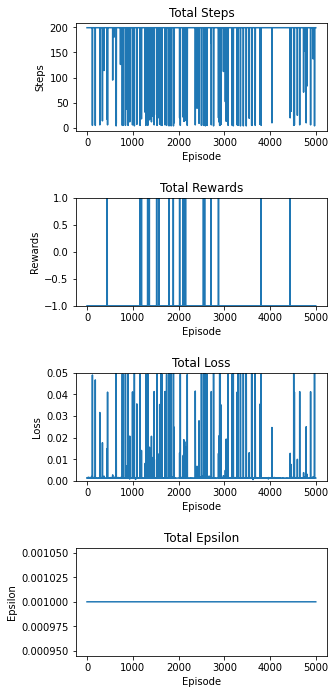

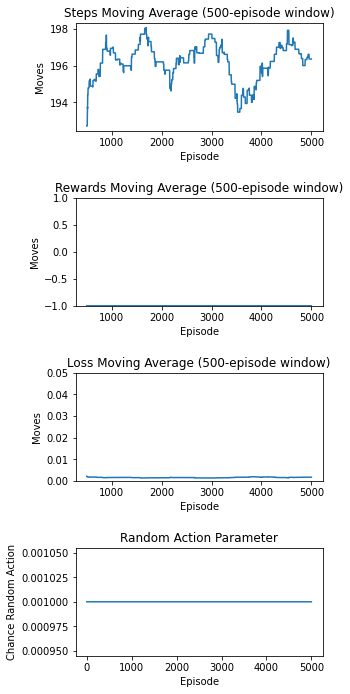

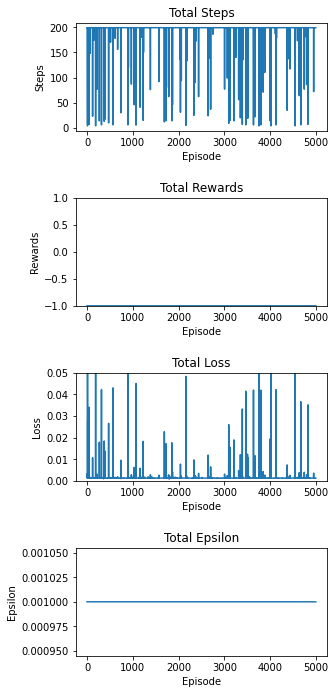

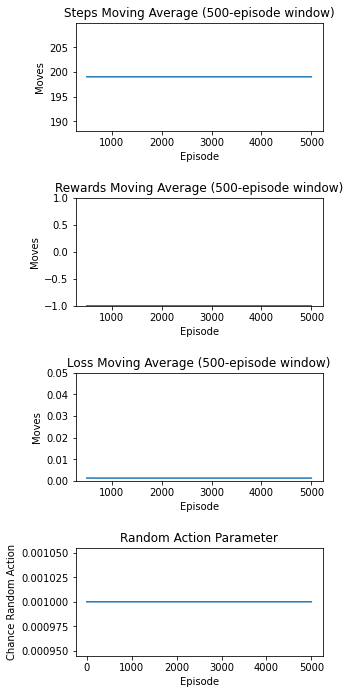

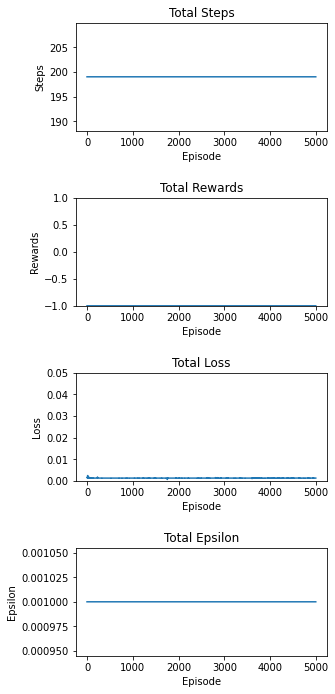

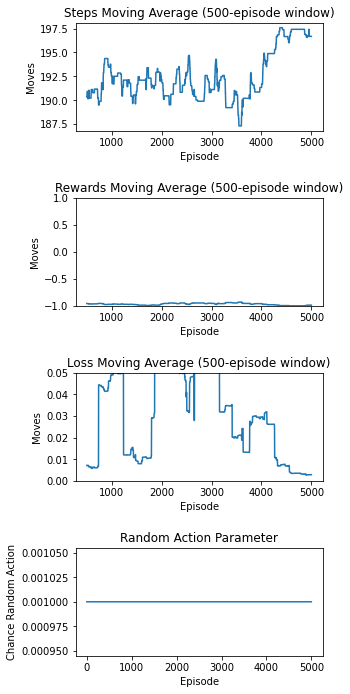

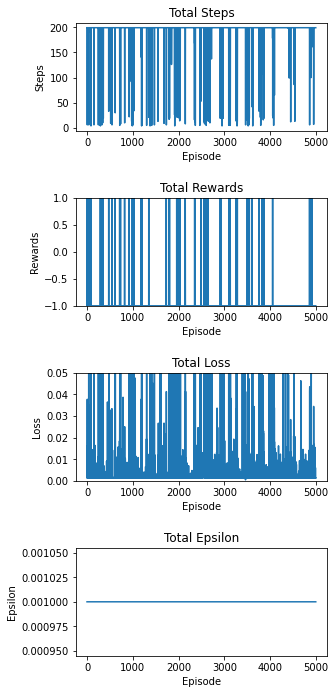

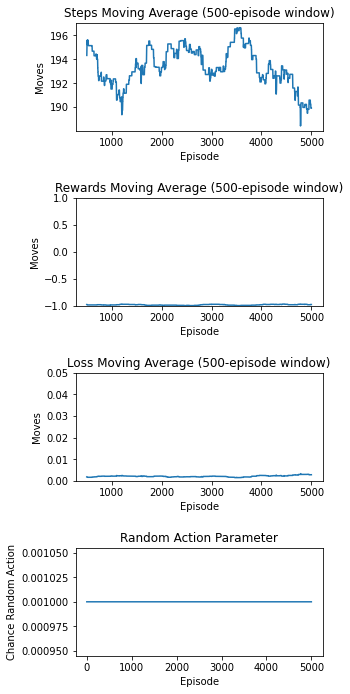

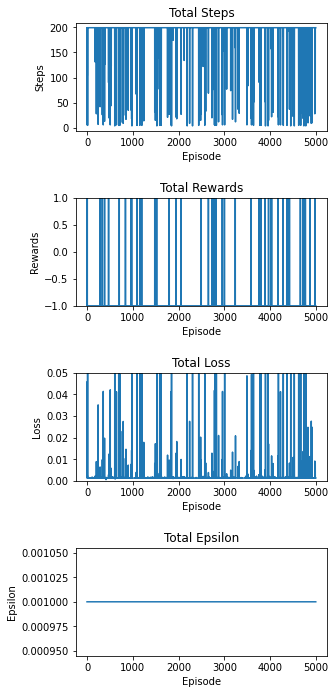

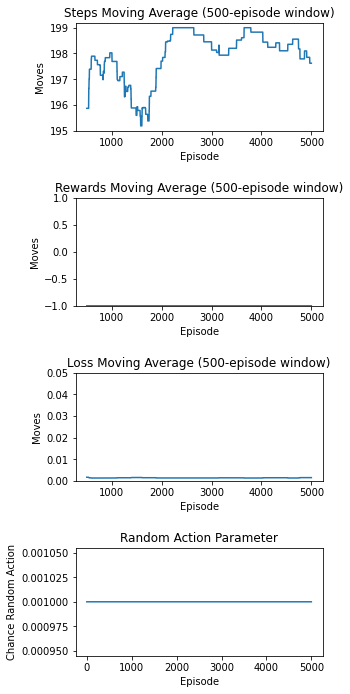

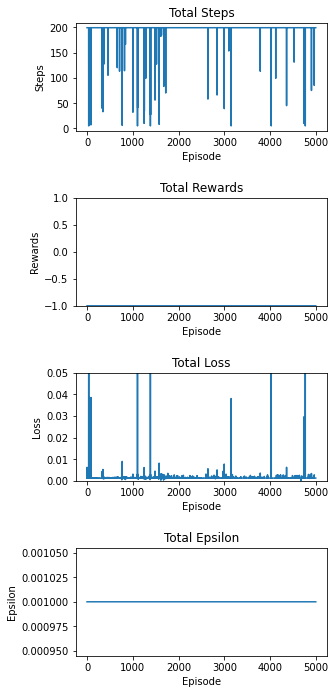

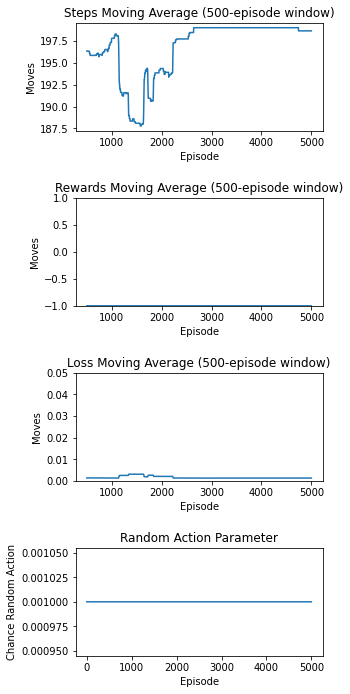

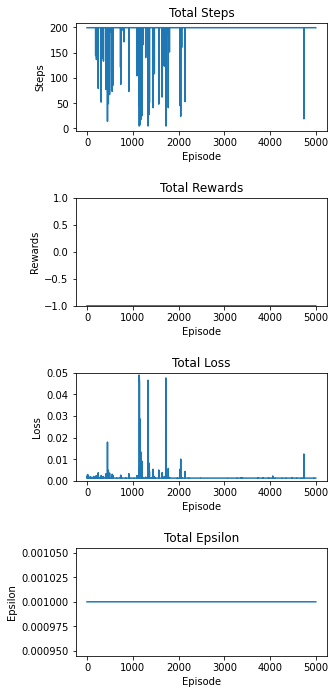

In [ ]:
if __name__ == "__main__": 

    # Environment
    env = gym.make('FrozenLake8x8-v0', is_slippery = False)

    # Reset the seed
    np.random.seed(2)
    env.seed(2)
    
    # Create directory to save models
    models_folder = 'dqn_models_deterministic2'
    make_directory(models_folder)

    #param_grid = {'episodes': [3000, 5000], 'steps': [100], 'gamma': [0.85, 0.9, 0.95, 0.99], 'e':[0.001, 0.01, 0.02, 0.03], 'lr':[0.1, 0.01, 0.001, 0.0001] }
    param_grid = {'episodes': [5000], 'steps': [200], 'gamma': [0.95, 0.97, 0.99], 'e':[0.01, 0.001], 'lr':[0.1, 0.01, 0.001, 0.0001] }
    #param_grid = {'episodes': [50], 'steps': [100], 'gamma': [0.85], 'e':[0.01], 'lr':[0.01] }
    
    results = pd.DataFrame(columns=['comb', 'episodes', 'steps', 'gamma', 'e', 'lr', 'wins', 'Success Ep', 'elapsed time (s)'])

    comb = 0

# GridSearch ParamGrid
    for c in ParameterGrid(param_grid):
        
        # Learning
        tic = time.time()
        step_list, e_list, reward_list, loss_list = run(env, models_folder, **c)
        toc = time.time()
        
        elapsed_time = toc - tic        
        
        wins = sum(i for i in reward_list if i > 0) 
        wins_rate = wins/ c['episodes']

        loss_avg = sum(loss_list) / c['episodes']

        new_row = {'comb': comb,
                   'episodes': c['episodes'],
                   'steps': c['steps'],
                   'gamma': c['gamma'],
                   'e': c['e'],
                   'lr': c['lr'],
                   'wins': wins,
                   'Success Ep': wins_rate,
                   'elapsed time (s)': elapsed_time} 
        
        results = results.append(new_row, ignore_index=True)

        print(new_row)

        # Create directory to save plots
        plots_folder = 'dqn_results_deterministic2'
        make_directory(plots_folder)

        # Plot by window rolling
        plot_results(False, True, plots_folder, c['episodes'], comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)

        # Plot list of values
        plot_result_lists(False, True, plots_folder, comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)        
        
        # Number of parameters combination
        comb += 1

        # dqn_results4 https://drive.google.com/drive/folders/1-5nHnRzwQky_9v6xDriZdRPRu5OEu3tt?usp=sharing
        # dqn_models4 https://drive.google.com/drive/folders/1Tkw8AsgHxYBGi5ouX0lwguQEv2M3EkEf?usp=sharing


In [ ]:
results

,comb,episodes,steps,gamma,e,lr,wins,Success Ep,elapsed time (s)
0,0.0,5000.0,200.0,0.95,0.010,0.1000,409.0,0.0818,753.450469
1,1.0,5000.0,200.0,0.95,0.010,0.0100,26.0,0.0052,895.509440
2,2.0,5000.0,200.0,0.95,0.010,0.0010,7.0,0.0014,915.051629
3,3.0,5000.0,200.0,0.95,0.010,0.0001,0.0,0.0000,937.475349
4,4.0,5000.0,200.0,0.97,0.010,0.1000,786.0,0.1572,692.541190
5,5.0,5000.0,200.0,0.97,0.010,0.0100,4867.0,0.9734,82.547559
6,6.0,5000.0,200.0,0.97,0.010,0.0010,1.0,0.0002,960.804473
7,7.0,5000.0,200.0,0.97,0.010,0.0001,8.0,0.0016,950.713125
8,8.0,5000.0,200.0,0.99,0.010,0.1000,1004.0,0.2008,651.527143
9,9.0,5000.0,200.0,0.99,0.010,0.0100,32.0,0.0064,900.615000


In [ ]:
    # step_list: step where 'Done' was threw, per episode
    # reward_list: total rewards per episode
    # loss_list: average loss per episode: total loss divided by final step number, per episode 
    # e_list: average loss per episode: total loss divided by final step number, per episode 

results.to_csv("Results_table_deterministic2.csv", sep='\t', encoding='utf-8', index=False)

### Test

In [ ]:
import argparse

import gym
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import time
from torch.autograd import Variable
from tqdm import trange


from dqn.agent import Agent
from model.architecture import Net
from utils import *


def run(env, episodes, steps, gamma, e, modelpkl):
    # Initialize history memory
    step_list = []
    reward_list = []
    loss_list = []
    e_list = []
    best_actions = []

    state_space = env.observation_space.n
    action_space = env.action_space.n

    agent = Agent(e, gamma, state_space, action_space, Net(state_space, action_space))
    agent.load_model(modelpkl)
    # agent.train(True)
    
    for i in trange(episodes):
        state = int(env.reset())
        reward_all = 0
        done = False
        s = 0
        total_loss = 0
        actions = []

        for s in range(steps):
            state = Variable(OH(state, state_space))

            # propose an action
            action = agent.select_action(state)

            # Save actions
            actions.append(action)

            # what are the consequences of taking that action?
            new_state, reward, done, _ = env.step(action)

            # if we're dead
            if done and (reward == 0.0):
                reward = -1

            # move to next state
            reward_all += reward

            # Render
            os.system('clear')
            env.render()
            time.sleep(0.5)

            #Breaks
            if reward == 1:
                best_actions.append(actions)
                break

            if done:
                break

            state = new_state

        # logging epochs
        step_list.append(s)
        reward_list.append(reward_all)

    return step_list, reward_list, best_actions   

In [ ]:
if __name__ == "__main__": 

    # Environment
    env = gym.make('FrozenLake8x8-v0', is_slippery=False)

    # Reset the seed
    np.random.seed(2)
    env.seed(2)
    
    # Create directory to save models

    ## Modelo 5
    episodes = 1
    steps = 200
    gamma = 0.97
    e = 0.01

    #actions
    best_actions = []

    # Predicting
    #for i in range(24):
    #name = str(i)
    modelpkl = "dqn_models_deterministic2/net_params_5000_200_0.97_0.01_0.01.pkl"    # model 5 , deterministic2

    step_list, reward_list, best_actions = run(env,episodes, steps, gamma, e, modelpkl)
    
    # Results
    wins = sum(i for i in reward_list if i > 0) 
    wins_rate = wins/ episodes 

    # Create directory to save plots
    #plots_folder = 'dqn_results4_test'
    #make_directory(plots_folder)


    ###########################################################################
    # step_list: step where 'Done' was threw, per episode
    # reward_list: total rewards per episode

    # Plot by window rolling
    #plot_results(False, True, plots_folder, c['episodes'], comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)

    # Plot list of values
    #plot_result_lists(False, True, plots_folder, comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)        
    
    # dqn_results4 https://drive.google.com/drive/folders/1-5nHnRzwQky_9v6xDriZdRPRu5OEu3tt?usp=sharing
    # dqn_models4 https://drive.google.com/drive/folders/1Tkw8AsgHxYBGi5ouX0lwguQEv2M3EkEf?usp=sharing


  0%|          | 0/1 [00:00<?, ?it/s]

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFF

100%|██████████| 1/1 [00:07<00:00,  7.40s/it]


In [ ]:
def show_best_actions():
    actions_names = ['l', 's', 'r', 'n']
    best_action =  [actions_names[a] for a in best_actions[0] ]
    print(best_action)

In [ ]:
show_best_actions()

['r', 'r', 'r', 'r', 's', 'r', 's', 'r', 's', 'r', 's', 's', 's', 's']


## Stochastic

### Train

In [ ]:
import argparse

import gym
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import time
from torch.autograd import Variable
from sklearn.model_selection import ParameterGrid
from tqdm import trange


from dqn.agent import Agent
from model.architecture import Net
from utils import *


def run(env, models_folder, episodes, steps, gamma, e, lr):
    # Initialize history memory
    step_list = []
    reward_list = []
    loss_list = []
    e_list = []

    state_space = env.observation_space.n
    action_space = env.action_space.n

    agent = Agent(e, gamma, state_space, action_space, Net(state_space, action_space))
    agent.train(True)
    # model.load_state_dict(torch.load('net_params.pkl'))
    loss = nn.MSELoss()
    optimizer = optim.Adam(agent.model.parameters(), lr=lr)

    for i in trange(episodes):
        state = int(env.reset())
        reward_all = 0
        done = False
        s = 0
        total_loss = 0

        for s in range(steps):
            state = Variable(OH(state, state_space))

            # propose an action
            action = agent.select_action(state)

            # what are the consequences of taking that action?
            new_state, reward, done, _ = env.step(action)

            # if we're dead
            if done and reward == 0.0:
                reward = -1

            # store memories for experience replay
            Q1 = agent.model(Variable(OH(new_state, state_space)))
            targetQ = agent.remember(Q1, action, reward)

            # optimize predicting rewards
            output = agent.model(state)
            train_loss = loss(output, targetQ)
            total_loss += train_loss.data

            agent.model.zero_grad()
            train_loss.backward()
            optimizer.step()

            # move to next state
            reward_all += reward
            state = new_state

            # decrease epsilon after success
            if done:
                if reward > 0:
                    agent.epsilon *= 0.9 + 1E-6  # always explore a bit during training
                break

        # logging epochs
        loss_list.append(total_loss / s)
        step_list.append(s)
        reward_list.append(reward_all)
        e_list.append(agent.epsilon)

    agent.save_model(f'{models_folder}/net_params_'+str(episodes)+'_'+str(steps)+'_'+str(gamma)+'_'+str(e)+'_'+str(lr)+'.pkl')
    return step_list, e_list, reward_list, loss_list    

In [ ]:
if __name__ == "__main__": 

    # Environment
    env = gym.make('FrozenLake8x8-v0', is_slippery=True)

    # Reset the seed
    np.random.seed(2)
    env.seed(2)
    
    # Create directory to save models
    models_folder = 'dqn_models4_stochastic'
    make_directory(models_folder)

    #param_grid = {'episodes': [3000, 5000], 'steps': [100], 'gamma': [0.85, 0.9, 0.95, 0.99], 'e':[0.001, 0.01, 0.02, 0.03], 'lr':[0.1, 0.01, 0.001, 0.0001] }
    param_grid = {'episodes': [5000], 'steps': [200], 'gamma': [0.95, 0.97, 0.99], 'e':[0.01, 0.001], 'lr':[0.1, 0.01, 0.001, 0.0001] }
    #param_grid = {'episodes': [50], 'steps': [100], 'gamma': [0.85], 'e':[0.01], 'lr':[0.01] }
    
    results = pd.DataFrame(columns=['comb', 'episodes', 'steps', 'gamma', 'e', 'lr', 'wins', 'Success Ep', 'elapsed time (s)'])

    comb = 0

# GridSearch ParamGrid
    for c in ParameterGrid(param_grid):
        
        # Learning
        tic = time.time()
        step_list, e_list, reward_list, loss_list = run(env, models_folder, **c)
        toc = time.time()
        
        elapsed_time = toc - tic        
        
        wins = sum(i for i in reward_list if i > 0) 
        wins_rate = wins/ c['episodes']

        loss_avg = sum(loss_list) / c['episodes']

        new_row = {'comb': comb,
                   'episodes': c['episodes'],
                   'steps': c['steps'],
                   'gamma': c['gamma'],
                   'e': c['e'],
                   'lr': c['lr'],
                   'wins': wins,
                   'Success Ep': wins_rate,
                   'elapsed time (s)': elapsed_time} 
        
        results = results.append(new_row, ignore_index=True)

        print(new_row)

        # Create directory to save plots
        plots_folder = 'dqn_results4_stochastic'
        make_directory(plots_folder)

        # Plot by window rolling
        plot_results(False, True, plots_folder, c['episodes'], comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)

        # Plot list of values
        plot_result_lists(False, True, plots_folder, comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)        
        
        # Number of parameters combination
        comb += 1

        # dqn_results4 https://drive.google.com/drive/folders/1-5nHnRzwQky_9v6xDriZdRPRu5OEu3tt?usp=sharing
        # dqn_models4 https://drive.google.com/drive/folders/1Tkw8AsgHxYBGi5ouX0lwguQEv2M3EkEf?usp=sharing


In [ ]:
results

,comb,episodes,steps,gamma,e,lr,wins,Success Ep,elapsed time (s)
0,0.0,5000.0,200.0,0.95,0.010,0.1000,57.0,0.0114,968.335433
1,1.0,5000.0,200.0,0.95,0.010,0.0100,44.0,0.0088,955.759223
2,2.0,5000.0,200.0,0.95,0.010,0.0010,2171.0,0.4342,461.252382
3,3.0,5000.0,200.0,0.95,0.010,0.0001,14.0,0.0028,196.077793
4,4.0,5000.0,200.0,0.97,0.010,0.1000,58.0,0.0116,957.397809
5,5.0,5000.0,200.0,0.97,0.010,0.0100,90.0,0.0180,984.809744
6,6.0,5000.0,200.0,0.97,0.010,0.0010,23.0,0.0046,885.253790
7,7.0,5000.0,200.0,0.97,0.010,0.0001,0.0,0.0000,445.987657
8,8.0,5000.0,200.0,0.99,0.010,0.1000,57.0,0.0114,961.957384
9,9.0,5000.0,200.0,0.99,0.010,0.0100,304.0,0.0608,957.601936


In [ ]:
    # step_list: step where 'Done' was threw, per episode
    # reward_list: total rewards per episode
    # loss_list: average loss per episode: total loss divided by final step number, per episode 
    # e_list: average loss per episode: total loss divided by final step number, per episode 

results.to_csv("Results_table_stochastic.csv", sep='\t', encoding='utf-8', index=False)

### Test

In [ ]:
import argparse

import gym
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import time

import matplotlib.pyplot  as plt
from torch.autograd import Variable
from tqdm import trange


from dqn.agent import Agent
from model.architecture import Net
from utils import *


def run(env, episodes, steps, gamma, e):
    # Initialize history memory
    step_list = []
    reward_list = []
    loss_list = []
    e_list = []
    best_actions = []

    state_space = env.observation_space.n
    action_space = env.action_space.n

    agent = Agent(e, gamma, state_space, action_space, Net(state_space, action_space))
    modelpkl = "dqn_models4_stochastic/net_params_5000_200_0.99_0.001_0.01.pkl"    
    agent.load_model(modelpkl)
    
    for i in trange(episodes):
        state = int(env.reset())
        reward_all = 0
        done = False
        s = 0
        total_loss = 0
        actions = []

        for s in range(steps):
            state = Variable(OH(state, state_space))

            # propose an action
            action = agent.select_action(state)

            # Save actions
            actions.append(action)

            # what are the consequences of taking that action?
            new_state, reward, done, _ = env.step(action)

            # if we're dead
            if done and (reward == 0.0):
                reward = -1

            # move to next state
            reward_all += reward

            # Render
            os.system('clear')
            env.render()
            #time.sleep(0.5)

            if reward==1:
                break

            if done:
                break

            state = new_state

        # logging epochs
        best_actions.append(actions)
        step_list.append(s)
        reward_list.append(reward_all)

    return step_list, reward_list, best_actions   

In [ ]:
if __name__ == "__main__": 

    # Environment
    env = gym.make('FrozenLake8x8-v0', is_slippery=True)

    # Reset the seed
    np.random.seed(2)
    env.seed(2) 

    ## Modelo 21 - Stochastic
    episodes = 1
    steps = 200
    gamma = 0.99
    e = 0.001
    lr = 0.01

    #actions
    best_actions = []

    # Learning
    step_list, reward_list, best_actions = run(env, episodes, steps, gamma, e)
    
    wins = sum(i for i in reward_list if i > 0) 
    wins_rate = wins/ episodes  

    # Create directory to save plots
    #plots_folder = 'dqn_results4_test'
    #make_directory(plots_folder)


    ###########################################################################
    # step_list: step where 'Done' was threw, per episode
    # reward_list: total rewards per episode

    # Plot by window rolling
    #plot_results(False, True, plots_folder, c['episodes'], comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)

    # Plot list of values
    #plot_result_lists(False, True, plots_folder, comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)        
    
    # dqn_results4 https://drive.google.com/drive/folders/1-5nHnRzwQky_9v6xDriZdRPRu5OEu3tt?usp=sharing
    # dqn_models4 https://drive.google.com/drive/folders/1Tkw8AsgHxYBGi5ouX0lwguQEv2M3EkEf?usp=sharing


  0%|          | 0/1 [00:00<?, ?it/s]

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF


100%|██████████| 1/1 [00:04<00:00,  4.80s/it]

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [ ]:
def show_best_actions():
    actions_names = ['l', 's', 'r', 'n']
    best_action =  [actions_names[a] for a in best_actions[0] ]
    print(best_action)

In [ ]:
show_best_actions()

['r', 'r', 'r', 'r', 'r', 'r', 'n', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
